In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from random import randint

# Задача 1


Генерируем выборку из равномерно распредедления с параметром тета N = $10^4$

In [3]:
teta, N = randint(0, 1000), 10**4
r = sps.uniform.rvs(loc=0, scale=teta, size=N)

Посчитаем следующие оценки параметра из задания для всех n <= N 

**A = $2\overline{X}$, B = $\overline{X}+X_{(n)}/2$, C = $(n+1)X_{(1)}$, D = $X_{(1)}$+$X_{(n)}$, E = $(n+1)/nX_{(n)}$.**

**P.S. оценка $\overline{X}$ рассматривалась в смысле зависимости от n (как указано в задании), при рассмотрении n=N получается прямая, близкая к нулю.**

Построим на одном графике разными цветами для всех оценок функции |teta - ^teta(n)|.

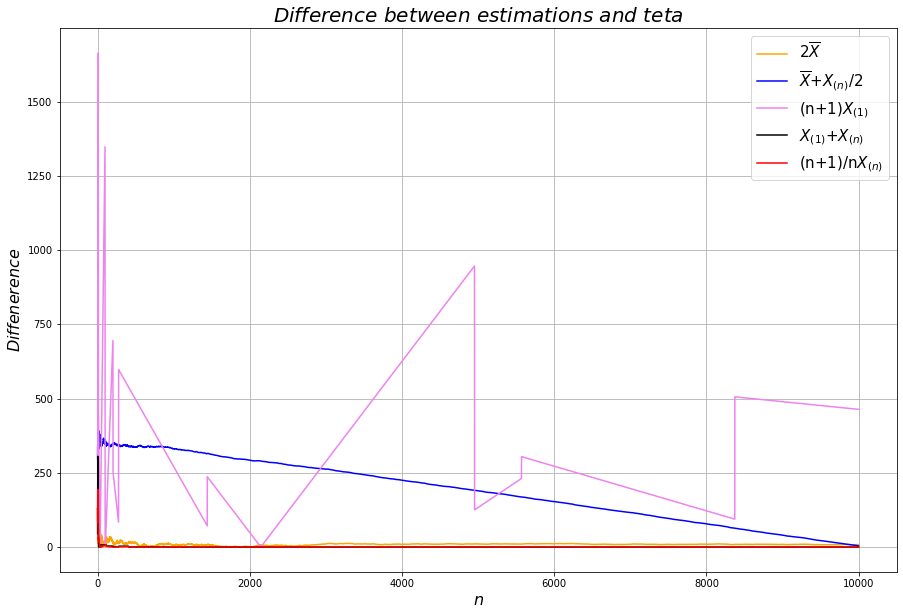

In [24]:
plt.figure(figsize=(15,10))
module_A, module_B, module_C, module_D, module_E = [], [], [], [], []
for n in range(1, N):
    A = 2*(r[:n].mean())
    module_A.append(abs(teta - A))
    B = r[:n].mean() + np.partition(r, n)[n]/2
    module_B.append(abs(teta - B))
    C = (n+1) * np.min(r[:n])
    module_C.append(abs(teta - C))
    D = np.min(r[:n]) + np.max(r[:n])
    module_D.append(abs(teta - D))
    E = ((n+1)/n) * np.max(r[:n])
    module_E.append(abs(teta - E))
    
plt.plot(range(1, N), module_A, color="orange", label="2$\overline{X}$")     
plt.plot(range(1, N), module_B, color="blue", label="$\overline{X}$+$X_{(n)}$/2")       
plt.plot(range(1, N), module_C, color="violet", label="(n+1)$X_{(1)}$")    
plt.plot(range(1, N), module_D, color="black", label="$X_{(1)}$+$X_{(n)}$")    
plt.plot(range(1, N), module_E, color="red", label="(n+1)/n$X_{(n)}$")
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$Diffenerence$', fontsize=16)
plt.title(r'$Difference$ $between$ $estimations$ $and$ $teta$', fontsize=20)
plt.legend(fontsize=15, loc=1)
plt.grid()

Заметим, что оценка (n+1)$X_{(1)}$ сильно отличается от $\theta$, исключим их и заново построим график при новой $\theta$. Отличие связано с тем, что данная оценка не является состоятельной, что было доказано на семинаре, то есть она не сходится даже по вероятности к истинному значению $\theta$ и поэтому сильно с ним различается даже при больших n. Остальные же оценки являются сильно состоятельными, то есть сходятся почти наверно к $\theta$ и поэтому их отклонение заметно меньше даже при небольших n.

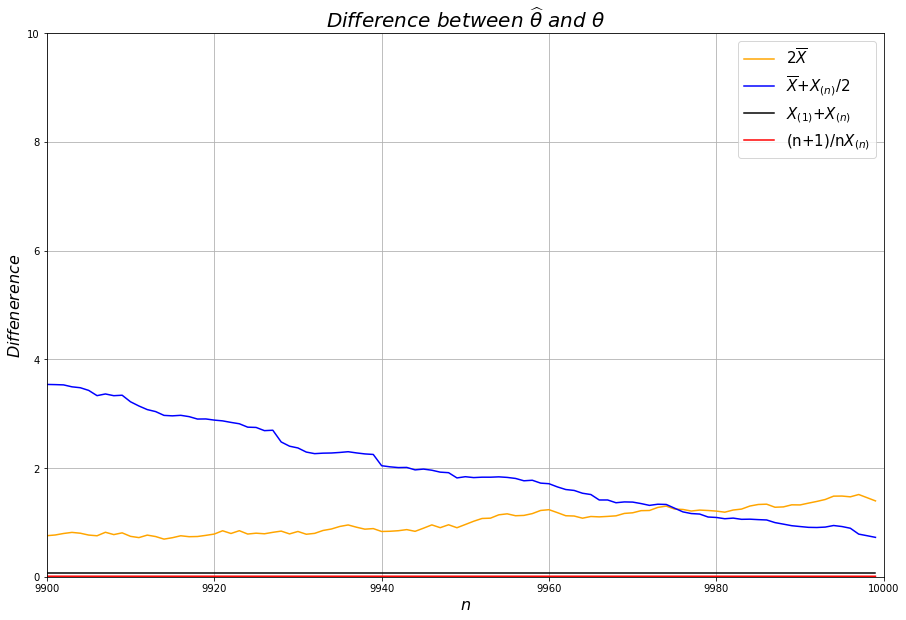

In [21]:
plt.figure(figsize=(15,10))
teta = randint(0, 1000)
r = sps.uniform.rvs(loc=0, scale=teta, size=N)
module_A, module_B, module_D, module_E = [], [], [], []
for n in range(1, N):
    A = 2*(r[:n].mean())
    module_A.append(abs(teta - A))
    B = r[:n].mean() + np.partition(r, n)[n]/2
    module_B.append(abs(teta - B))
    D = np.min(r[:n]) + np.max(r[:n])
    module_D.append(abs(teta - D))
    E = ((n+1)/n) * np.max(r[:n])
    module_E.append(abs(teta - E))
    
plt.plot(range(1, N), module_A, color="orange", label="2$\overline{X}$")     
plt.plot(range(1, N), module_B, color="blue", label="$\overline{X}$+$X_{(n)}$/2")   
plt.plot(range(1, N), module_D, color="black", label="$X_{(1)}$+$X_{(n)}$")    
plt.plot(range(1, N), module_E, color="red", label="(n+1)/n$X_{(n)}$")
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$Diffenerence$', fontsize=16)
plt.title(r'$Difference$ $between$ $\widehat{\theta}$ $and$ $\theta$', fontsize=20)
plt.ylim((0, 10))
plt.xlim((9900, 10000))
plt.legend(fontsize=15, loc=1)
plt.grid()

Проведем несколько экспериментов при разных $\theta$

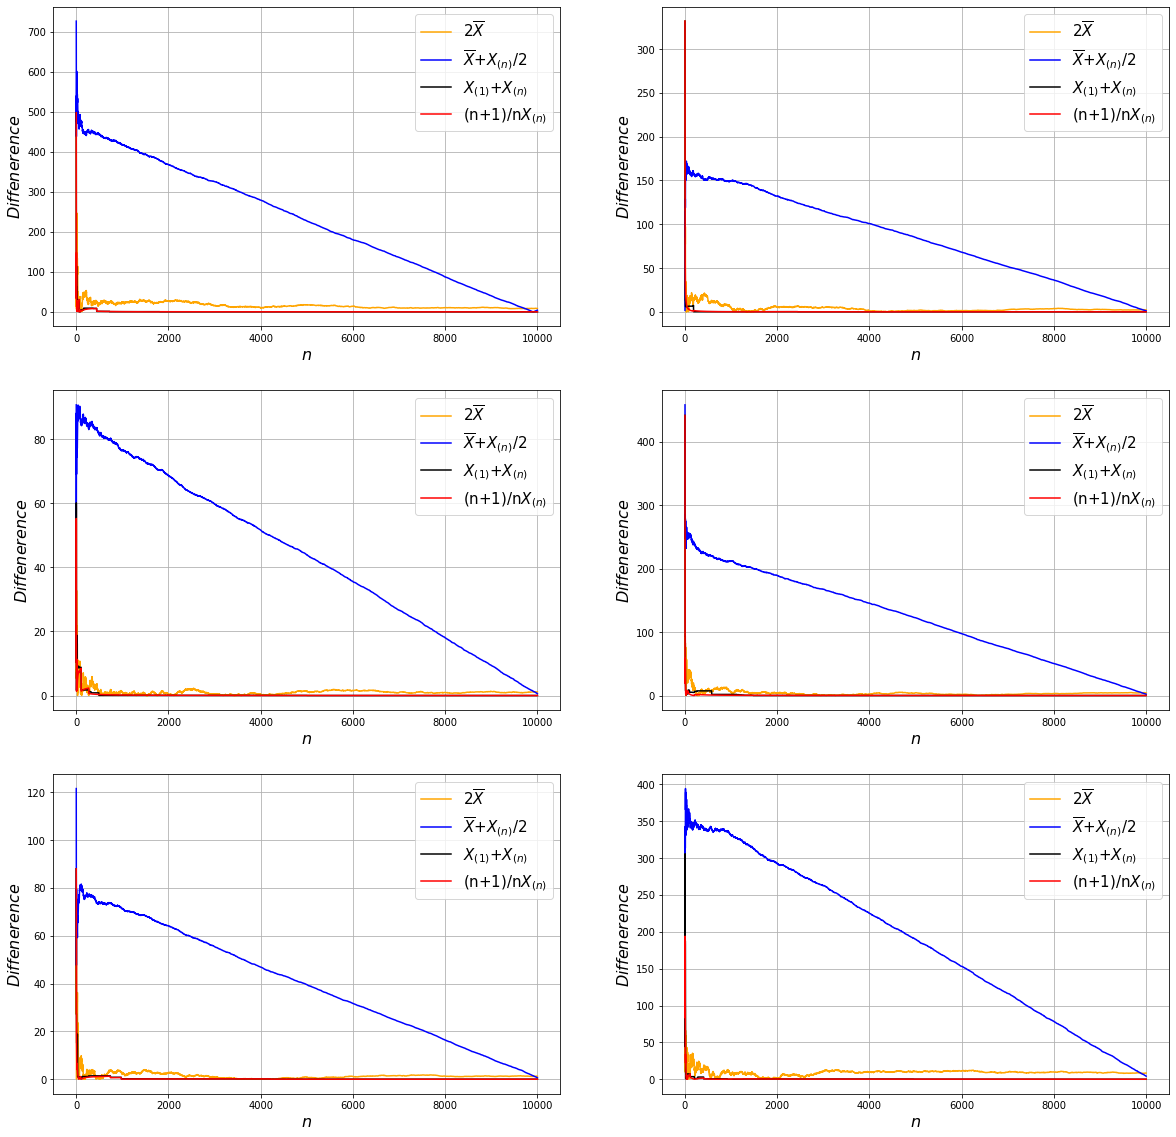

In [23]:
plt.figure(figsize=(20,20))
for k in range(1, 7): 
    teta = randint(0, 1000)
    r = sps.uniform.rvs(loc=0, scale=teta, size=N)
    module_A, module_B, module_D, module_E = [], [], [], []
    for n in range(1, N):
        A = 2*(r[:n].mean())
        module_A.append(abs(teta - A))
        B = r[:n].mean() + np.partition(r, n)[n]/2
        module_B.append(abs(teta - B))
        D = np.min(r[:n]) + np.max(r[:n])
        module_D.append(abs(teta - D))
        E = ((n+1)/n) * np.max(r[:n])
        module_E.append(abs(teta - E))
    
    plt.subplot(3, 2, k)
    plt.plot(range(1, N), module_A, color="orange", label="2$\overline{X}$")     
    plt.plot(range(1, N), module_B, color="blue", label="$\overline{X}$+$X_{(n)}$/2")   
    plt.plot(range(1, N), module_D, color="black", label="$X_{(1)}$+$X_{(n)}$")    
    plt.plot(range(1, N), module_E, color="red", label="(n+1)/n$X_{(n)}$")
    plt.xlabel(r'$n$', fontsize=16)
    plt.ylabel(r'$Diffenerence$', fontsize=16)
    ##plt.ylim((0, 5)) ## расскоментировав эти строки можно посмотреть на сходимость при больших n
    ##plt.xlim((9900, 10000))
    plt.legend(fontsize=15, loc=1) 
    plt.grid()
plt.show()

Проведя несколько экспериментов при разных $\theta$, получим, что лучшие оценки параметра $\theta$ - красная($(n+1)/nX_{(n)}$) и черная($X_{(1)}+X_{(n)}$):
при стремящемся n к N эти оценки стремятся к $\theta$. 

**Таким образом**, мы исследовали равномерное распределение и можем сказть, что **оценки $X_{(1)}$+$X_{(n)}$; $(n+1)/nX_{(n)}$ - при  n->N дают самую хорошую оценку $\theta$, оценки  2$\overline{X}$ и $\overline{X}$+$X_{(n)}/2$ - не самую хорошую, $(n+1)X_{(1)}$ - плохо оценивает параметр $\theta$.**

## Задача 2

Сгенерируем выборку из экспоненциального распределения с параметром $\theta$ = 1 и N = $10^4$.
Рассмотрим оценки $\left(k! \middle/ \overline{X^k} \right)^{1 / k}$ для различных k.

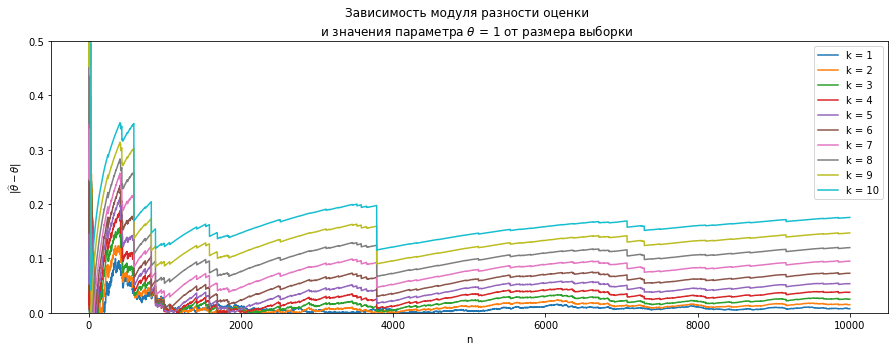

In [44]:
import scipy
plt.figure(figsize=(15, 5))
theta, N = 1, 10**4
sample = sps.expon.rvs(loc=0, scale=theta, size=N)

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    est_vals = np.zeros(N)
    for n in range(1, N):
        est_vals[n] = (scipy.special.factorial(k) / np.mean(sample[:n + 1] ** k)) ** (1 / k)
    plt.plot(range(1, N + 1), abs(est_vals - 1), label="k = {}".format(k))
    plt.title(r"""Зависимость модуля разности оценки 
    и значения параметра $\theta$ = 1 от размера выборки""")
    plt.xlabel("n")
    plt.ylabel(r"$|\widehat\theta - \theta|$")
    plt.ylim(0, 0.5)
    plt.legend();

**Таким образом**, мы исследовали экспоненциальное распределение и выяснили, что при любом значении $k$ оценка стремится к истинному значению, но чем она больше, тем больше погрешность, соответственно лучшей оценки можно достичь при $k = 1$.

## Задача 3

Возьмем распредление со следующей функцией плотности $f = \frac{5}{x^6} I(x \in [1, \infty])$. 
Его первые четыре момента конечны, а пятый нет (так как интеграл $\int_1^\inf \frac{1}{x}$ расходится). Сгенерируем выборку размера $N = 10^4$ для этого распределения.<br> <br>
Построим график плотности и нанесем на него точки выборки (с нулевой y-координатой).

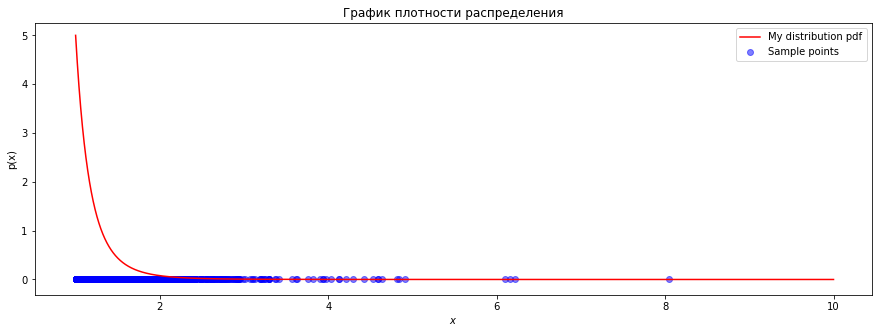

In [62]:
plt.figure(figsize=(15, 5))
class my_pdf(sps.rv_continuous):
    def _pdf(self, x):
        return 5 / (x ** 6)

sample = my_pdf(a=1).rvs(size=N)

lins = np.linspace(1, 10, 10**4)
plt.plot(lins, my_pdf(a=1).pdf(lins), color='red', label='My distribution pdf')
plt.scatter(sample, np.zeros(N), alpha=0.5, color="blue", label="Sample points")
plt.xlabel("$x$")
plt.ylabel("p(x)")
plt.title("График плотности распределения")
plt.legend();

Для всех $n ≤ N$ посчитаем оценку $s^2$ для дисперсии и построим график зависимости
модуля разности оценки дисперсии и ее истинного значения $D_{real}X_1 = EX_1^2 - (EX_1)^2 = \frac{5}{48}$ от n.

Text(0.5, 1.0, 'График зависимости модуля разности оценки дисперсии и ее истинного значения от n')

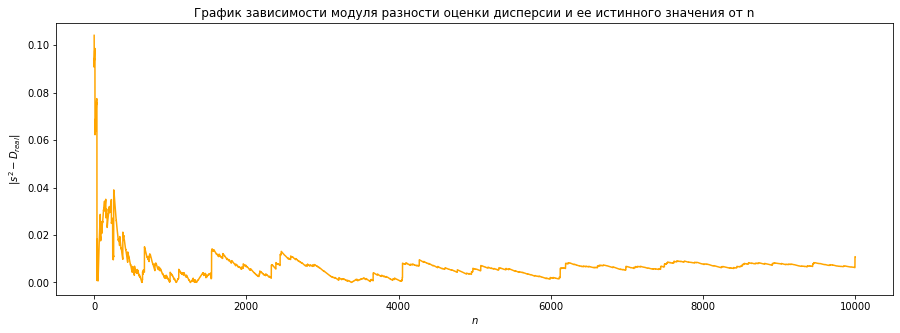

In [73]:
plt.figure(figsize=(15, 5))
module_s_disp = [abs(np.mean(sample[:n] ** 2) - np.mean(sample[:n]) ** 2 - 5/48) \
     for n in range(1, N)]

plt.plot(range(1, N), module_s_disp, color="orange")
plt.xlabel(r"$n$")
plt.ylabel(r"$|s^2 - D_{real}|$")
plt.title("""График зависимости модуля разности оценки дисперсии и ее истинного значения от n""")

**Таким образом,** можно заметить из графика, что для распределения с существующими первыми четырьмя моментами 
оценка дисперсии приближается к истинной при увеличении размера выборки

## Задача 4

Сгенерируем выборку из стандартного нормального распределения и посчитаем по ней эмпирическую функцию распределения. 
Для $n = {10, 25, 50, 100, 1000, N}$ построим графики эмпирической функции распределения и реальной функции распределения.

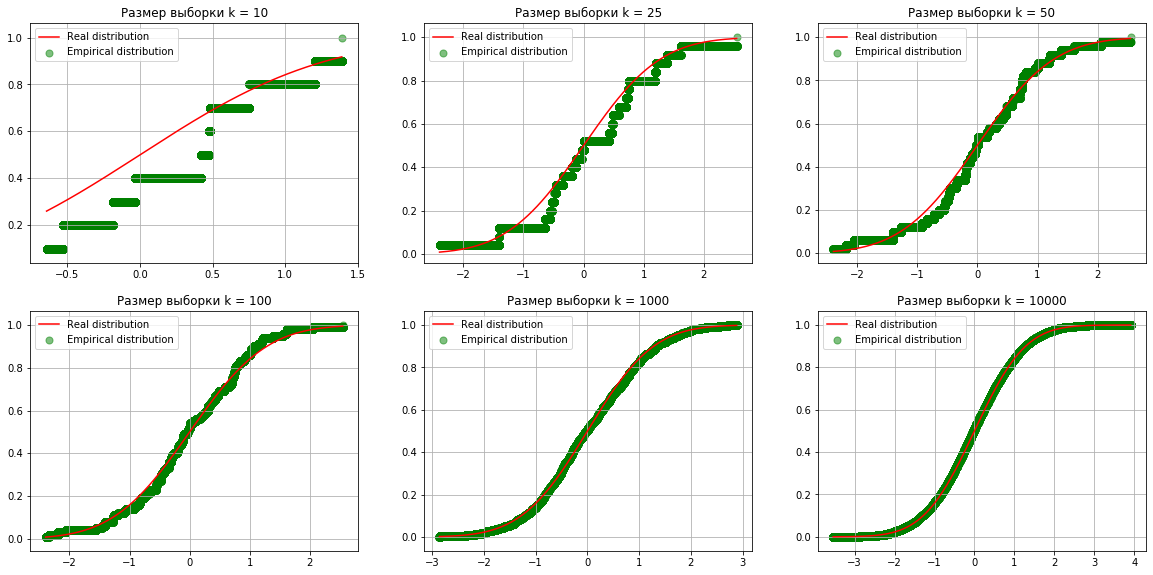

In [50]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20, 15))
X = sps.norm.rvs(size=10**4)
i = 1
for k in [10, 25, 50, 100, 1000, N]:
    ecdf = ECDF(X[:k])
    lins = np.linspace(X[:k].min(), X[:k].max(), 100000)
    real_distr = sps.norm.cdf(lins)
    plt.subplot(3, 3, i)
    i+=1
    plt.scatter(lins, ecdf(lins), alpha=0.5, s=50, color="green", label = "Empirical distribution")
    plt.plot(lins, real_distr, "r", label="Real distribution")
    plt.title("Размер выборки k = {}".format(k))
    plt.grid()
    plt.legend()
plt.show()

Мжно заметить, что при увеличении выборки эмпиричиская функция распределения все ближе приближается к истинной.<br> Для всех $n ≤ N$ посчитаем точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$ Построим график зависимости статистики $D_n$ и $\sqrt{n} {D}_n$ от $n$.

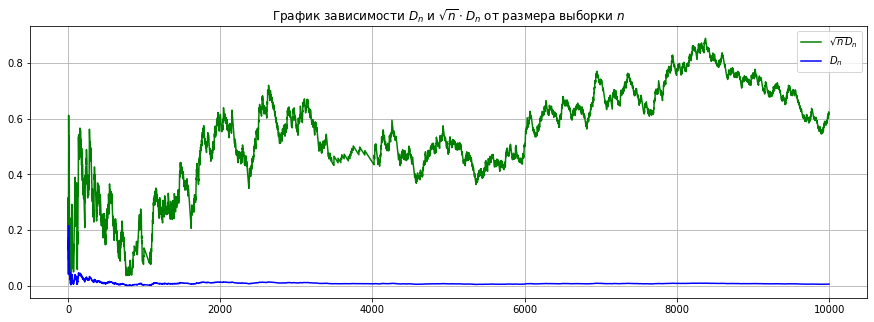

In [51]:
from math import sqrt
plt.figure(figsize=(15, 5))
X = sps.norm.rvs(size=10**4)
step = np.arange(1, 1000)
Dn = [np.abs(ECDF(X[:n])(step) - sps.norm.cdf(step, loc=0, scale=1)).max()
      for n in range(1, 10**4)]
squared_n_Dn = [sqrt(n) * Dn[n-1] for n in range(1, 10**4)]

plt.plot(range(1, 10**4), squared_n_Dn,color="green", label="$\sqrt{n} {D}_n$")
plt.plot(range(1, 10**4), Dn, color="blue", label='${D}_n$')
plt.title(r"График зависимости $D_n$ и $\sqrt{n} \cdot D_n$ от размера выборки $n$")
plt.grid()
plt.legend()
plt.show()

**Вывод:** По графику можно заметить, что  $D_n→0$ , что соотвествует УЗБЧ. Из второго графика можно сказать, что скорость сходимости пропорциональна $\frac{1}{\sqrt{n}}$.